<a href="https://colab.research.google.com/github/SamAlrahmani/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/LS_DS_111_Exploratory_Data_Analysis_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Loading and Exploring Datasets

This assignment is purposely open-ended. You will be asked to load datasets from the [UC-Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). 

Even though you maybe using different datasets than your fellow classmates, try and be supportive and assist each other in the challenges that you are facing. You will only deepend your understanding of these topics as you work to assist one another. Many popular UCI datasets face similar data loading challenges.

Remember that the UCI datasets do not necessarily have a file type of `.csv` so it's important that you learn as much as you can about the dataset before you try and load it. See if you can look at the raw text of the file either locally or using the `!curl` shell command -or in some other way before you try and read it in as a dataframe. This will help you catch what would otherwise be unforseen problems.

Feel free to embellish this notebook with additional markdown cells,code cells, comments, graphs, etc. Whatever you think helps adequately address the questions.

## 1) Load a dataset from UCI (via its URL)

Please navigate to the home page and choose a dataset (other than the Adult dataset) from the "Most Popular" section on the right-hand side of the home page. Load the dataset via its URL and check the following (show your work):

- Are the headers showing up properly?
- Look at the first 5 and the last 5 rows, do they seem to be in order?
- Does the dataset have the correct number of rows and columns as described in the UCI page? 
 - Remember, that UCI does not count the y variable (column of values that we might want to predict via a machine learning model) as an "attribute" but rather as a "class attribute" so you may end up seeing a number of columns that is one greater than the number listed on the UCI website.
- Does UCI list this dataset as having missing values? Check for missing values and see if your analysis corroborates what UCI reports?
- if `NaN` values or other missing value indicators are not being detected by `df.isnull().sum()` find a way to replace whatever is indicating the missing values with `np.NaN`.
- Use the .describe() function in order to see the summary statistics of both the numeric and non-numeric columns. 

In [0]:
#Imports
import pandas as pd
import numpy as np

In [0]:
u_col=['price', 'buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [43]:
cars =pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data',
                  header=None, 
                  names=u_col)
cars.head()

,price,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [44]:
cars.tail(5)

,price,buying,maint,doors,persons,lug_boot,safety
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [45]:

cars.shape

(1728, 7)

In [46]:
cars.columns

Index(['price', 'buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')

In [47]:
#col types
cars.dtypes

price       object
buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [48]:
#Summary stats of numaric numeric cols
cars.describe

<bound method NDFrame.describe of       price buying  maint doors persons lug_boot safety
0     vhigh  vhigh      2     2   small      low  unacc
1     vhigh  vhigh      2     2   small      med  unacc
2     vhigh  vhigh      2     2   small     high  unacc
3     vhigh  vhigh      2     2     med      low  unacc
4     vhigh  vhigh      2     2     med      med  unacc
...     ...    ...    ...   ...     ...      ...    ...
1723    low    low  5more  more     med      med   good
1724    low    low  5more  more     med     high  vgood
1725    low    low  5more  more     big      low  unacc
1726    low    low  5more  more     big      med   good
1727    low    low  5more  more     big     high  vgood

[1728 rows x 7 columns]>

In [49]:
#Describe string/object var
cars.describe(exclude='number')

,price,buying,maint,doors,persons,lug_boot,safety
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,low,low,2,2,big,low,unacc
freq,432,432,432,576,576,576,1210


In [50]:
#Call Frequencies of vaiable
cars['price'].value_counts().describe().sort_values(ascending=False)

max      432.0
75%      432.0
50%      432.0
25%      432.0
min      432.0
mean     432.0
count      4.0
std        0.0
Name: price, dtype: float64

In [51]:
cars['safety'].value_counts().describe().sort_values(ascending=False)

max      1210.000000
75%       590.500000
std       539.767234
mean      432.000000
50%       226.500000
25%        68.000000
min        65.000000
count       4.000000
Name: safety, dtype: float64

In [52]:
#Missing values
cars.isnull().sum()

price       0
buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
dtype: int64

In [53]:
#filter on col
cars[['doors', 'buying', 'safety']].sample(10)

,doors,buying,safety
652,2,med,unacc
349,more,low,acc
846,4,low,unacc
1303,2,vhigh,unacc
849,4,low,unacc
1369,more,vhigh,unacc
194,2,high,unacc
147,4,high,unacc
697,more,med,acc
563,more,high,acc


In [54]:
#call freq. of var
cars['lug_boot'].value_counts(ascending=False).head().sort_index()

high    576
low     576
med     576
Name: lug_boot, dtype: int64

In [55]:
#filters on rows
cars.iloc[3]

price       vhigh
buying      vhigh
maint           2
doors           2
persons       med
lug_boot      low
safety      unacc
Name: 3, dtype: object

In [0]:
#fix missing data
cars=cars.replace('low', np.NaN)

In [57]:
#check for missing data
cars.isnull().sum()

price       432
buying      432
maint         0
doors         0
persons       0
lug_boot    576
safety        0
dtype: int64

In [0]:
#get rid of missing data
cars.dropna(inplace=True)

In [59]:
#check for rid of missing
cars.isnull().sum()

price       0
buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
dtype: int64

## 2) Load a dataset from your local machine.
Choose a second dataset from the "Popular Datasets" listing on UCI, but this time download it to your local machine instead of reading it in via the URL. Upload the file to Google Colab using the files tab in the left-hand sidebar or by importing `files` from `google.colab` The following link will be a useful resource if you can't remember the syntax: <https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92>

- Answer all of the same bullet point questions from part 1 again on this new dataset. 


In [0]:
#Imports
import pandas as pd
import numpy as np

In [0]:
u_col_2=['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of_ash', 'Magnesium', 
         'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 
         'Proanthocyanins', 'Color intensity', 'Hue', 
         'OD280/OD315 of diluted wines', 'Proline']

In [94]:
wines= pd.read_csv('wine.csv', header=None, 
                  names=u_col_2)
wines.head()

,Alcohol,Malic acid,Ash,Alcalinity of_ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [95]:
wines.tail(5)

,Alcohol,Malic acid,Ash,Alcalinity of_ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [97]:
wines.shape

(178, 13)

In [98]:
wines.dtypes

Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of_ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

In [100]:
wines.describe

<bound method NDFrame.describe of     Alcohol  Malic acid   Ash  ...   Hue  OD280/OD315 of diluted wines  Proline
1     14.23        1.71  2.43  ...  1.04                          3.92     1065
1     13.20        1.78  2.14  ...  1.05                          3.40     1050
1     13.16        2.36  2.67  ...  1.03                          3.17     1185
1     14.37        1.95  2.50  ...  0.86                          3.45     1480
1     13.24        2.59  2.87  ...  1.04                          2.93      735
..      ...         ...   ...  ...   ...                           ...      ...
3     13.71        5.65  2.45  ...  0.64                          1.74      740
3     13.40        3.91  2.48  ...  0.70                          1.56      750
3     13.27        4.28  2.26  ...  0.59                          1.56      835
3     13.17        2.59  2.37  ...  0.60                          1.62      840
3     14.13        4.10  2.74  ...  0.61                          1.60      560

[178 

In [106]:
wines.columns

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of_ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [107]:
#Missing values
wines.isnull().sum()

Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of_ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [0]:
#get rid of missing data
wines.dropna(inplace=True)

In [109]:
#check Missing values
wines.isnull().sum()

Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of_ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [110]:
#call freq. of var
wines['Alcohol'].value_counts(ascending=False).head().sort_index()

12.00    3
12.08    5
12.29    4
12.37    6
13.05    6
Name: Alcohol, dtype: int64

## 3) Make Crosstabs of the Categorical Variables

Take whichever of the above datasets has more categorical variables and use crosstabs to tabulate the different instances of the categorical variables.


In [113]:
wines[['Alcohol', 'Malic acid']].sample(5)

,Alcohol,Malic acid
1,12.85,1.60
2,13.34,0.94
1,14.30,1.92
3,13.16,3.57
2,11.84,0.89


In [114]:
# make crosstabe
pd.crosstab(wines['Malic acid'], wines['Alcohol'])

Alcohol,11.03,11.41,11.45,11.46,11.56,11.61,11.62,11.64,11.65,11.66,11.76,11.79,11.81,11.82,11.84,11.87,11.96,12.00,12.04,12.07,12.08,12.16,12.17,12.20,12.21,12.22,12.25,12.29,12.33,12.34,12.36,12.37,12.42,12.43,12.45,12.47,12.51,12.52,12.53,12.58,...,13.62,13.63,13.64,13.67,13.68,13.69,13.71,13.72,13.73,13.74,13.75,13.76,13.77,13.78,13.82,13.83,13.84,13.86,13.87,13.88,13.90,13.94,14.02,14.06,14.10,14.12,14.13,14.16,14.19,14.20,14.21,14.22,14.23,14.30,14.34,14.37,14.38,14.39,14.75,14.83
Malic acid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.74,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.89,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.92,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5.04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5.19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5.51,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
xtabs = pd.crosstab(wines['Magnesium'], wines['Malic acid'], normalize=True,
            margins=True)

In [138]:
#call it back
xtabs.values
xtabs.index

Index([   70,    78,    80,    81,    82,    84,    85,    86,    87,    88,
          89,    90,    91,    92,    93,    94,    95,    96,    97,    98,
          99,   100,   101,   102,   103,   104,   105,   106,   107,   108,
         110,   111,   112,   113,   115,   116,   117,   118,   119,   120,
         121,   122,   123,   124,   126,   127,   128,   132,   134,   136,
         139,   151,   162, 'All'],
      dtype='object', name='Magnesium')

## 4) Explore the distributions of the variables of the dataset using:
- Histograms
- Scatterplots
- Density Plots

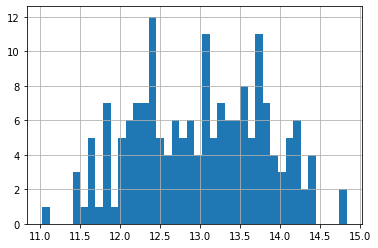

In [141]:
#freqs of doors
wines['Alcohol'].hist(bins=40);

## 5) Create at least one visualization from a crosstab:

Remember that a crosstab is just a dataframe and can be manipulated in the same way by row index, column, index, or column/row/cell position.


In [142]:
#pull some summary stats on doors
wines['Alcohol'].head()

1    14.23
1    13.20
1    13.16
1    14.37
1    13.24
Name: Alcohol, dtype: float64

In [153]:
#summary stats
wines['Magnesium'].describe()

count    178.000000
mean      99.741573
std       14.282484
min       70.000000
25%       88.000000
50%       98.000000
75%      107.000000
max      162.000000
Name: Magnesium, dtype: float64

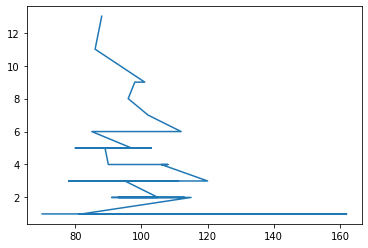

In [154]:
#freqs
wines['Magnesium'].value_counts().plot();

In [146]:
wines.head()

,Alcohol,Malic acid,Ash,Alcalinity of_ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


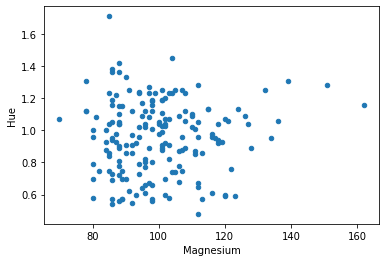

In [147]:
wines.plot.scatter('Magnesium', 'Hue'); 

In [148]:
xtabs

Malic acid,0.74,0.89,0.9,0.92,0.94,0.98,0.99,1.01,1.07,1.09,1.1,1.13,1.17,1.19,1.21,1.24,1.25,1.29,1.33,1.34,1.35,1.36,1.39,1.41,1.43,1.45,1.47,1.48,1.5,1.51,1.52,1.53,1.57,1.59,1.6,1.61,1.63,1.64,1.65,1.66,...,3.24,3.26,3.27,3.3,3.37,3.43,3.45,3.55,3.57,3.59,3.7,3.74,3.8,3.83,3.84,3.86,3.87,3.88,3.9,3.91,3.98,3.99,4.04,4.1,4.12,4.28,4.3,4.31,4.36,4.43,4.6,4.61,4.72,4.95,5.04,5.19,5.51,5.65,5.8,All
Magnesium,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
70,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005618,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005618
78,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005618,0.000000,0.000000,0.000000,0.005618,0.005618,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016854
80,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005618,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.005618,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005618,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005618,0.000000,0.000000,0.000000,0.000000,0.028090
81,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005618
82,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

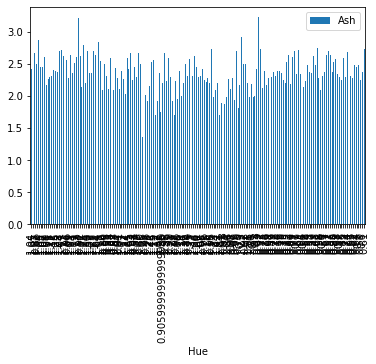

In [158]:
wines.plot(kind='bar', x='Hue', y= 'Ash');

In [151]:
myresults=pd.crosstab(wines['Hue'], wines['Magnesium'])
myresults

Magnesium,70,78,80,81,82,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,110,111,112,113,115,116,117,118,119,120,121,122,123,124,126,127,128,132,134,136,139,151,162
Hue,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.48,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.54,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.55,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.56,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.57,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.36,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1.38,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1.42,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


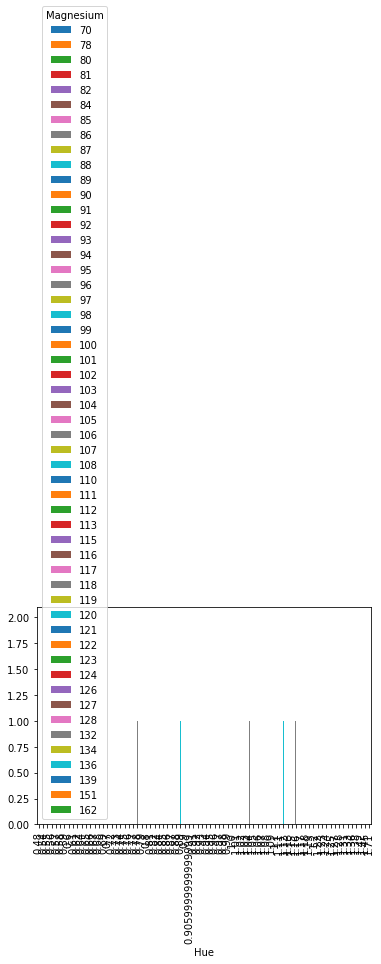

In [152]:
myresults.plot(kind='bar');

## Stretch Goals 

The following additional study tasks are optional, they are intended to give you an opportunity to stretch yourself beyond the main requirements of the assignment. You can pick and choose from the below, you do not need to complete them in any particular order.

### - Practice Exploring other Datasets

### -  Try using the Seaborn plotting library's "Pairplot" functionality in order to explore all of the possible histograms and scatterplots of your dataset all at once:

[Seaborn Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

### - Turn some of the continuous variables into categorical variables by binning the values using:
- [pd.cut()](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html)
- [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)
- <https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut>

And then use crosstabs to compare/visualize these binned variables against the other variables.


### - Other types and sources of data
Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.